### ברוכים הבאים לתרגיל המסכם של Decision Trees ו Random Forests!

### בתרגיל הזה נעבוד עם מאגר המידע Iris - מאגר מידע של זני אירוסים.

### נבנה מודלים שלפי מאפיינים של האירוסים, יעריכו את הזן שלהם.

### ייבאו את החבילות numpy, matplotlib, seaborn, pandas והריצו את הפקודה שגורמת לגרפים להופיע ב jupyter notebook

### טענו את מאגר המידע Iris.csv לתוך משתנה. המאגר נמצא בתיקייה jupyter notebooks/Decision Trees & Random Forests ובאתר Kaggle בכתובת: https://www.kaggle.com/uciml/iris

In [2]:
df = 
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


### אין לנו צורך במאפיין Id כי יש לנו מספור ב DataFrame. תמחקו אותו מ df

In [3]:

df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### Sepal זה עלה כותרת. כל המאפיינים כאן קשורים לעלי הכותרת של האירוסים. 
### Species הוא מאפיין המטרה - סוג האירוס

### הריצו את הפקודה info על df כדי לראות את סוגי המאפיינים והאם יש חוסרים.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


### כל המאפיינים חוץ ממאפיין המטרה הם מספריים, ואין חוסרים.

### הראו את גרף ה pairplot שיציג לנו את היחסים בין כל המאפיינים המספריים - כולם חוץ ממאפיין המטרה

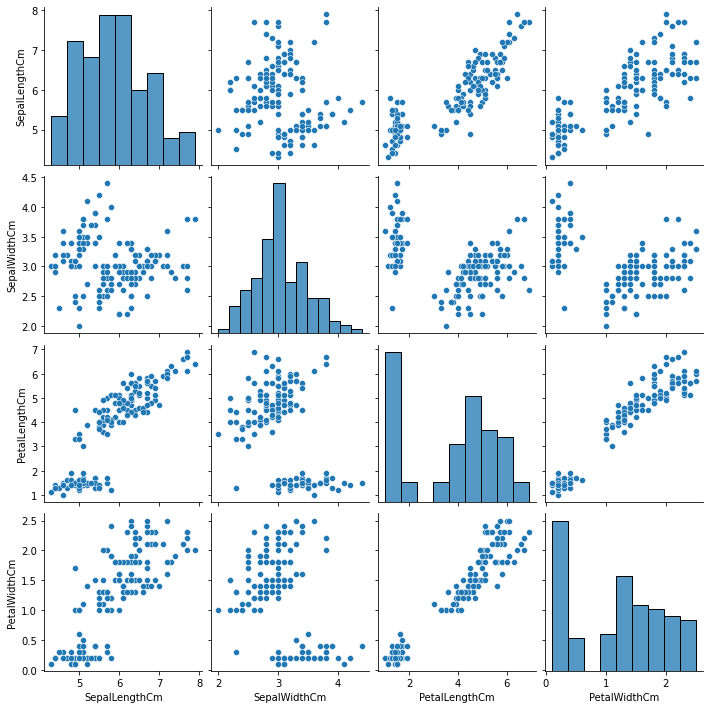

### אפשר לראות קורלציה חזקה בין PetalWidth ו PetalLength
### עוד אפשר לראות שהמאפיינים  SepalLength , SepalWidth מתפלגים נורמלית, בעוד שהמאפיינים PetalLength, PetalWidth לא. 
### אם היינו משתמשים ב Linear Regression למשל, היינו צריכים לבצע פעולה כדי לגרום לכל המאפיינים להתפלג נורמלית - בדרך כלל להפעיל את פונקציית ה log. אבל בגלל שמדובר במודלים מבוססי עצים, לא יעזור לנו שהמאפיינים יתפלגו נורמלית.
### הסבר: במודל כמו Linear Regression יש חשיבות למרחק בין הנקודות. ככל שנקודה רחוקה יותר מהקו, כך הטעות עליה גדולה יותר. בעוד במודל מבוסס עץ החלטה, אנחנו קובעים עבור מאפיין ערך מסויים, ועבורו המידע מתחלק לשניים - אלה שקטנים ממנו ואלה שגדולים ממנו. אין סיבה שהמידע יתפלג נורמלית כי המרחק מהערך הזה לא משפיע.

### נראה את היחס שבין המאפיינים למאפיין המטרה. צור את גרפי ה countplot עבור כל מאפיין, עם חלוקה לפי מאפיין המטרה

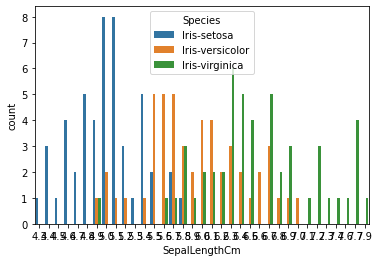

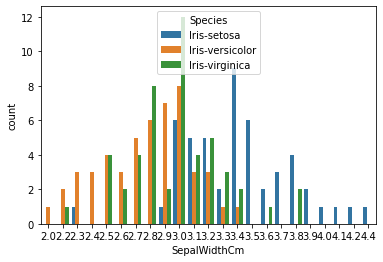

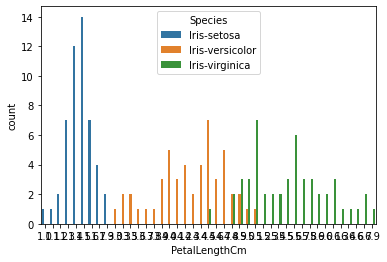

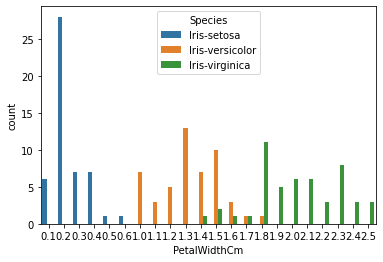

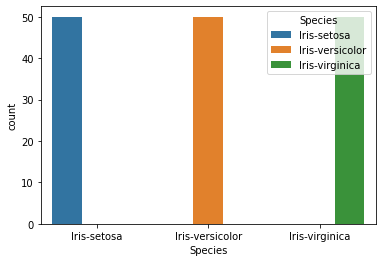

### אפשר לראות הפרדה ברורה בין הקטגוריות השונות לפי ערכי המאפיינים PetalWidthCm, PetalLengthCm. עבור המאפיינים האחרים גם יש הפרדה כלשהי, אבל לא מושלמת. בכל זאת יש שם הפרדה, ולכן נשאיר את כל המאפיינים.

### תיצרו את רשימת המאפיינים שנשתמש בהם

In [7]:

features

['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']

### חלקו את המידע ל X, Y

In [8]:
X = 
Y = 

In [9]:
X.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [10]:
Y.head()

0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: Species, dtype: object

### חלקו את המידע ל X_train, Y_train, X_test, Y_test עם גודל train של 80% ו random_state = 42

In [12]:
X_train.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
22,4.6,3.6,1.0,0.2
15,5.7,4.4,1.5,0.4
65,6.7,3.1,4.4,1.4
11,4.8,3.4,1.6,0.2
42,4.4,3.2,1.3,0.2


In [13]:
Y_test.head()

73     Iris-versicolor
18         Iris-setosa
118     Iris-virginica
78     Iris-versicolor
76     Iris-versicolor
Name: Species, dtype: object

### תיצרו מודל של Decision Tree ותאמנו אותו על ה train

In [14]:
from sklearn.tree import DecisionTreeClassifier


DecisionTreeClassifier()

### שמרו את תחזית המודל על ה test

In [15]:
Y_pred =

In [16]:
Y_pred

array(['Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa'], dtype=object)

### הראו את אחוזי הדיוק של המודל בעזרת classification_report של sklearn

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



### הגענו ל 100% דיוק ול 100% recall.
### אם נחזור ונסתכל קצת על הגרפים, אפשר לראות שמאגר המידע היה קל מאוד לפתירה, לכן זה לא מפתיע שקיבלנו ציונים טובים.
### עכשיו זה הרגע שבוא היינו צריכים לאמן מודל Random Forest ולראות שהציונים השתפרו, אבל יותר מ100% דיוק אני לא חושב שאפילו Random Forest יצליח להשיג. בואו לפחות נראה שהדיוק לא יורד.

### תאמנו מודל Random Forest עם 30 עצים על train

In [18]:
from sklearn.ensemble import RandomForestClassifier


RandomForestClassifier(n_estimators=30)

### שמרו את תחזית המודל על ה test

In [19]:
Y_pred = 

In [20]:
Y_pred

array(['Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa'], dtype=object)

### הציגו את אחוזי הדיוק עם classification_report

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



### שוב, 100% דיוק!
### כל הכבוד! נתראה בפרק הבא, בו נלמד על Deep Learning - רשתות נוירונים.